In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Pre-processing

-used Survived column as target array for training \
-removed unwanted columns for input training data and test data in the dataset \
-used one-hot encoding to convert categorical values to numerical values 

In [5]:
target = df.Survived
inputs = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
dummies = pd.get_dummies(inputs.Sex)

In [7]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [8]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [9]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


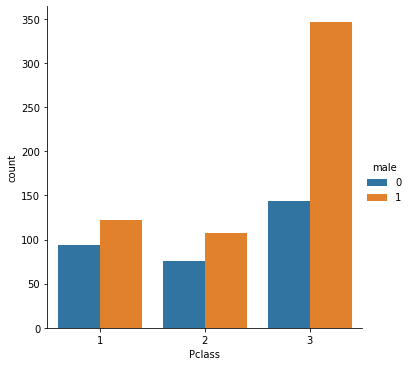

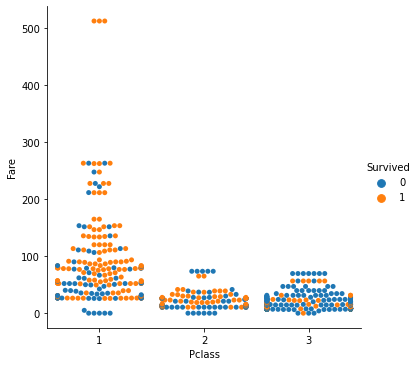

In [10]:
inputs["Survived"] = target
sns.catplot(x='Pclass', hue='male',data=inputs, kind='count')
sns.catplot(x='Pclass', y='Fare', hue='Survived', data=df, kind='swarm')

In [11]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
pId = test_data.PassengerId
X_test = test_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
dummies1 = pd.get_dummies(X_test.Sex)
X_test = pd.concat([X_test,dummies1],axis='columns')
X_test.drop('Sex',axis='columns',inplace=True)
X_test.head()

,Pclass,Age,Fare,female,male
0,3,34.5,7.8292,0,1
1,3,47.0,7.0000,1,0
2,2,62.0,9.6875,0,1
3,3,27.0,8.6625,0,1
4,3,22.0,12.2875,1,0


# Model definition

In [28]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        
    def predict(self,X):
        predicted_label = [self._predict(x) for x in X]
        return predicted_label
        
    def _predict(self,x):
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]
        
        k_ind = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_ind]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return int(most_common[0][0])

# Training 

In [29]:
X_train = inputs.to_numpy(dtype=np.float64)
y_train = target.to_numpy(dtype=np.float64)
knn = KNN()
knn.fit(X_train,y_train)

# Testing

In [30]:
# X_test.head(15)
x = X_test.to_numpy(dtype=np.float64)
prediction = knn.predict(x)
for i in range(len(pId)):
    print(pId[i],prediction[i])

892 0
893 0
894 1
895 1
896 0
897 0
898 0
899 1
900 0
901 1
902 0
903 0
904 1
905 0
906 0
907 1
908 0
909 0
910 1
911 0
912 0
913 0
914 0
915 1
916 1
917 0
918 1
919 0
920 0
921 0
922 1
923 1
924 1
925 0
926 1
927 0
928 0
929 0
930 0
931 0
932 0
933 0
934 0
935 1
936 1
937 0
938 0
939 0
940 1
941 0
942 1
943 0
944 1
945 1
946 0
947 0
948 0
949 0
950 0
951 1
952 0
953 1
954 0
955 1
956 1
957 0
958 1
959 0
960 0
961 1
962 0
963 0
964 1
965 0
966 1
967 1
968 0
969 0
970 0
971 0
972 1
973 1
974 1
975 0
976 0
977 0
978 1
979 1
980 0
981 0
982 0
983 0
984 1
985 0
986 0
987 0
988 1
989 0
990 1
991 0
992 1
993 1
994 0
995 0
996 1
997 0
998 0
999 0
1000 0
1001 0
1002 0
1003 0
1004 1
1005 0
1006 1
1007 0
1008 0
1009 1
1010 1
1011 1
1012 0
1013 0
1014 1
1015 0
1016 0
1017 0
1018 0
1019 0
1020 1
1021 0
1022 1
1023 1
1024 0
1025 0
1026 0
1027 0
1028 1
1029 0
1030 1
1031 0
1032 0
1033 1
1034 1
1035 1
1036 0
1037 0
1038 0
1039 0
1040 0
1041 0
1042 1
1043 0
1044 0
1045 1
1046 0
1047 0
1048 0
1049 1
10

# Writing the predictions into a csv file 

In [31]:
df = pd.DataFrame()
df['passengerID'] = pd.Series(pId)
df['prediction'] = pd.Series(prediction)
df.to_csv('knn_submission.csv',index=False)